# 00: Data Check

## Import message data
See valid types (enforced in `schema.py`) and data is correctly imported by `loader.py`

In [1]:
import lob_market_making_sim.io.loader as loader
pa_event_table = loader.lobster_to_arrow('../data/AMZN_2012-06-21_34200000_57600000_message_1.csv')
pa_event_table
len(pa_event_table)

57515

## Convert message data to OrderEvent
Ensure that data from Pyarrow table is correctly loaded into `Iterable[OrderEvent]`

In [2]:
order_events = loader.arrow_to_events(pa_event_table)
order_events

[OrderEvent(ts=34200.017459617, etype=<EventType.EXECUTE_HIDDEN: 5>, oid=0, size=1, price=223.82000000000002, direction=<Direction.SELL: -1>),
 OrderEvent(ts=34200.18960767, etype=<EventType.ADD: 1>, oid=11885113, size=21, price=223.81, direction=<Direction.BUY: 1>),
 OrderEvent(ts=34200.190226476, etype=<EventType.EXECUTE_VISIBLE: 4>, oid=11885113, size=21, price=223.81, direction=<Direction.BUY: 1>),
 OrderEvent(ts=34200.190226476, etype=<EventType.EXECUTE_VISIBLE: 4>, oid=11534792, size=26, price=223.75, direction=<Direction.BUY: 1>),
 OrderEvent(ts=34200.372779672, etype=<EventType.EXECUTE_HIDDEN: 5>, oid=0, size=100, price=223.84, direction=<Direction.SELL: -1>),
 OrderEvent(ts=34200.375671205, etype=<EventType.EXECUTE_HIDDEN: 5>, oid=0, size=100, price=223.84, direction=<Direction.SELL: -1>),
 OrderEvent(ts=34200.383971366, etype=<EventType.EXECUTE_HIDDEN: 5>, oid=0, size=100, price=223.86, direction=<Direction.SELL: -1>),
 OrderEvent(ts=34200.38581571, etype=<EventType.EXECUTE_H

## Generate Parquet file from data

In [3]:
from lob_market_making_sim.io.store import ArrowStore
import lob_market_making_sim.io.schema as schema
my_arrow_store = ArrowStore(schema.COL_SCHEMA)
my_arrow_store.add_batch(pa_event_table)
my_arrow_store.flush('data/parquet/AMZN_2025-06-12.parquet')

PosixPath('data/parquet/AMZN_2025-06-12.parquet')

## Load Parquet, plot first 100 mid-prices, confirm timestamps monotone.

In [6]:
import pandas as pd
df = pd.read_parquet('data/parquet/AMZN_2025-06-12.parquet')
df

,time,event_type,order_id,size,price,direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.190226,4,11885113,21,2238100,1
3,34200.190226,4,11534792,26,2237500,1
4,34200.372780,5,0,100,2238400,-1
...,...,...,...,...,...,...
57510,57599.545828,4,282917222,9,2205100,1
57511,57599.545828,4,286916542,51,2205100,1
57512,57599.903989,3,287142900,100,2206200,-1
57513,57599.958245,1,287174077,100,2206300,-1


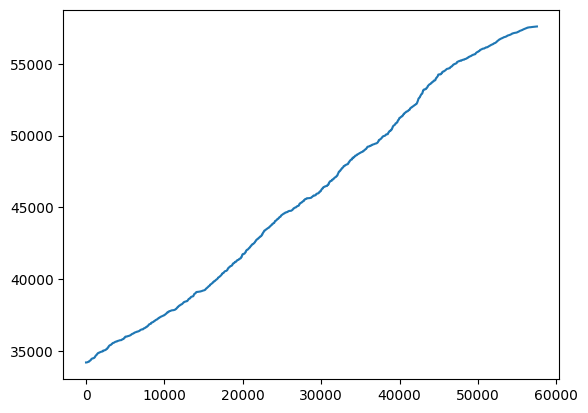

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['time']) # To check that timestamps are monotone